In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load the Iris dataset
df = sns.load_dataset('iris')

# Extract sepal length and width columns
X = df[['sepal_length', 'sepal_width']].values
y_true = df['species'].map({'setosa': 0, 'versicolor': 1, 'virginica': 2})


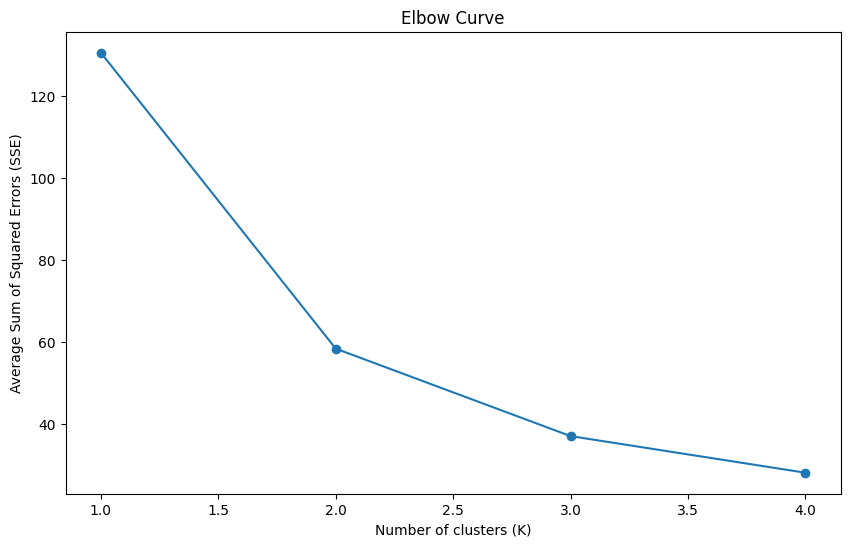

In [6]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))


class KMeans:
    def __init__(self, max_clusters=4, max_iters=200, plot_steps=False, n_init=10):
        self.max_clusters = max_clusters
        self.max_iters = max_iters
        self.plot_steps = plot_steps
        self.n_init = n_init

        # list to store SSE (Sum of Squared Errors) for each k
        self.sse = []

    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape # number of rows (samples) and columns (features) in the array.

        # Run KMeans for different values of K
        for k in range(1, self.max_clusters + 1):
            sse_values = []
            for _ in range(self.n_init):  # Multiple initializations for random centroids.
                self.K = k
                random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
                centroids = [self.X[idx] for idx in random_sample_idxs]

                for _ in range(self.max_iters):
                    clusters = self._create_clusters(centroids)
                    centroids_old = centroids
                    centroids = self._get_centroids(clusters)
                    if self._is_converged(centroids_old, centroids):
                        break

                # Calculate SSE for this K and initialization
                sse = self._calculate_sse(clusters, centroids)
                sse_values.append(sse)

            # Average SSE for multiple initializations
            avg_sse = np.mean(sse_values)
            self.sse.append(avg_sse)

        # Find the elbow point (optimal K) using the elbow method
        optimal_k = self._find_optimal_k()

        # Perform KMeans with the optimal K
        self.K = optimal_k
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]
        for _ in range(self.max_iters):
            clusters = self._create_clusters(self.centroids)
            centroids_old = self.centroids
            self.centroids = self._get_centroids(clusters)
            if self._is_converged(centroids_old, self.centroids):
                break

        # Store the final clusters for plotting
        self.clusters = clusters

        # Classify samples as the index of their clusters
        return self._get_cluster_labels(clusters)

    def _create_clusters(self, centroids):
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters

    def _closest_centroid(self, sample, centroids):
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_index = np.argmin(distances)
        return closest_index

    def _get_centroids(self, clusters):
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids

# It calculates the Euclidean distance between each old centroid (centroids_old[i]) and its corresponding new centroid (centroids[i]).
# The distances are stored in a list called distances


    def _is_converged(self, centroids_old, centroids):
        distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]
        return sum(distances) == 0

    def _calculate_sse(self, clusters, centroids):
        sse = 0
        for i, cluster in enumerate(clusters):
            cluster_center = centroids[i]
            sse += np.sum((self.X[cluster] - cluster_center) ** 2)
        return sse

    def _find_optimal_k(self):
        # Plotting the Elbow Curve
        plt.figure(figsize=(10, 6))
        plt.plot(range(1, self.max_clusters + 1), self.sse, marker='o')
        plt.xlabel('Number of clusters (K)')
        plt.ylabel('Average Sum of Squared Errors (SSE)')
        plt.title('Elbow Curve')
        plt.show()

        # Find the elbow point (optimal K)
        diff = np.diff(self.sse)
        diff_r = diff[1:] / diff[:-1]
        optimal_k = np.argmin(diff_r) + 1
        return optimal_k

    def _get_cluster_labels(self, clusters):
        labels = np.empty(self.n_samples)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_index in cluster:
                labels[sample_index] = cluster_idx
        return labels

    def plot_clusters(self):
        fig, ax = plt.subplots(figsize=(12, 8))

        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)

        for point in self.centroids:
            ax.scatter(*point, marker="x", color="black", linewidth=2)

        plt.show()


# Apply K-means clustering to the Iris dataset
kmeans = KMeans(max_clusters=4, max_iters=200, plot_steps=False, n_init=10)
y_pred = kmeans.predict(X)


# Plotting clusters
#kmeans.plot_clusters()


c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


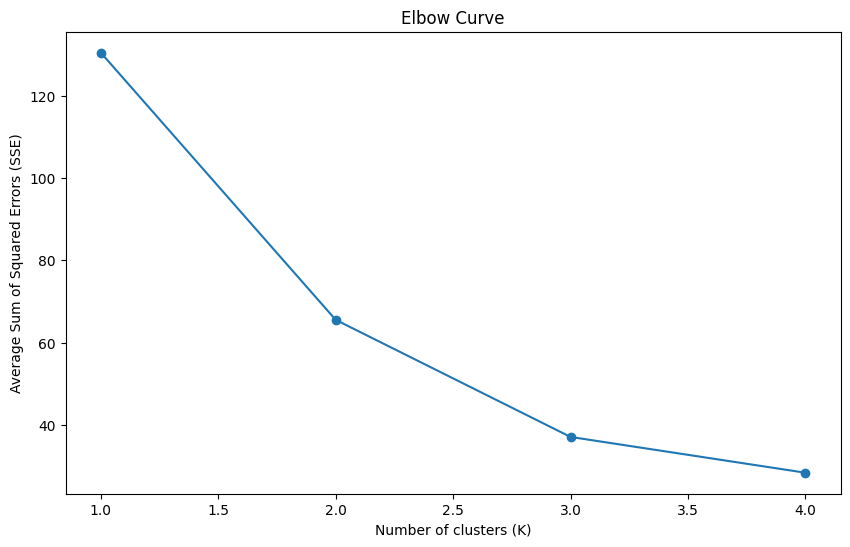

                 Predicted Cluster 0  Predicted Cluster 1  Predicted Cluster 2
True Setosa                        0                   50                    0
True Versicolor                   24                   26                    0
True Virginica                    43                    7                    0


In [8]:
# Assuming y_true is defined from the previous code block
# Apply K-means clustering to the Iris dataset
kmeans = KMeans(max_clusters=4, max_iters=200, plot_steps=False, n_init=10)
y_pred = kmeans.predict(X)  # Assuming X is defined and contains the Iris dataset features

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Convert confusion matrix to a Pandas DataFrame for better visualization
contingency_table = pd.DataFrame(cm, index=['True Setosa', 'True Versicolor', 'True Virginica'], 
                                 columns=['Predicted Cluster 0', 'Predicted Cluster 1', 'Predicted Cluster 2'])

print(contingency_table)
